In [14]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler






In [15]:
# Load the dataset
df = pd.read_csv('DataScience_salaries_2024.csv')
df.head(5)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [16]:

#finding the statistical values for the datasalaries data set
data = df.describe()
# printing describe function.
data








,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


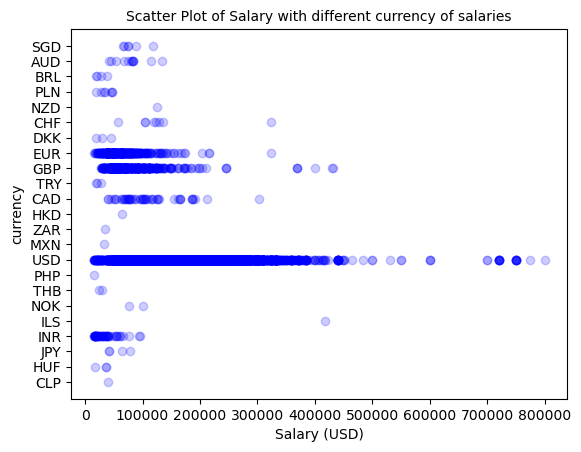

In [17]:
#Ploting of scatter plot

# Sample data (using the provided snippet)
data = df[['salary_in_usd', 'salary_currency']]

# Create scatter plot
plt.scatter(data['salary_in_usd'], data['salary_currency'], color='blue', alpha=0.2)

# Add labels and title
plt.xlabel('Salary (USD)',fontsize=10)
plt.ylabel('currency',fontsize=10)
plt.title('Scatter Plot of Salary with different currency of salaries',fontsize=10)

# Display scatter plot
plt.show()



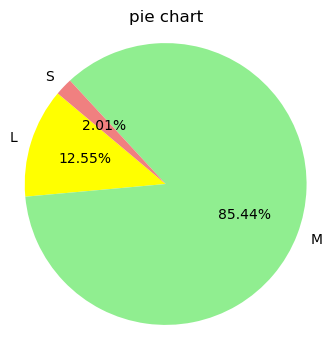

In [18]:
#plotting of pie chart

# Group by job_title and calculate the total salary for each job title
total_salary_by_companysize = df.groupby('company_size')['salary'].sum()

#color scheme
colors = ['yellow','lightgreen', 'lightcoral', 'lightskyblue']

# Plotting
plt.figure(figsize=(4,4))
plt.pie(total_salary_by_companysize, labels=total_salary_by_companysize.index, autopct='%2.2f%%', startangle=140,colors=colors)
plt.title('pie chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

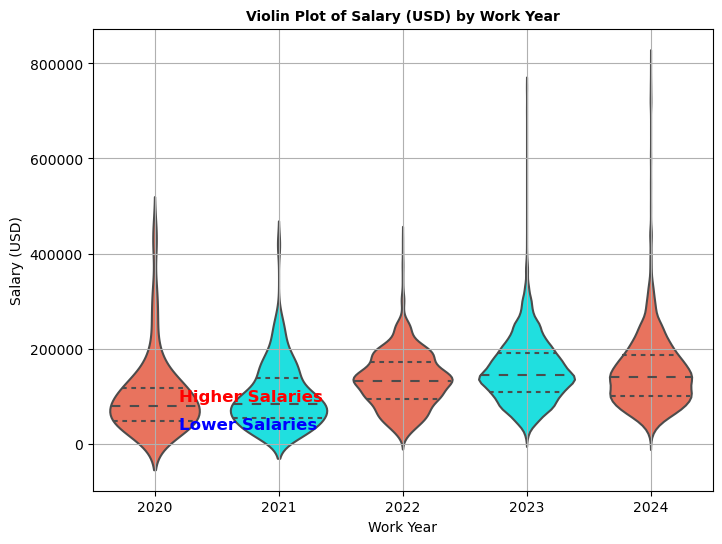

In [7]:
#plotting of violin graph

custom_palette = ['#FF6347','#00ffff']

# Create violin plot                
plt.figure(figsize=(8,6))
sns.violinplot(x='work_year', y='salary_in_usd', data=df, palette=custom_palette,inner='quartile') # 'quartile' for quartiles as lines inside the violins

# Add annotations
plt.text(0.2, 90000, 'Higher Salaries', fontsize=12, color='red', fontweight='bold')
plt.text(0.2, 30000, 'Lower Salaries', fontsize=12, color='blue', fontweight='bold')

# Add title and labels
plt.title('Violin Plot of Salary (USD) by Work Year', fontsize=10, fontweight='bold')
plt.xlabel('Work Year', fontsize=10)
plt.ylabel('Salary (USD)', fontsize=10)

# Show plot
plt.grid(True)
plt.show()

D:\Anaconda 2024\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


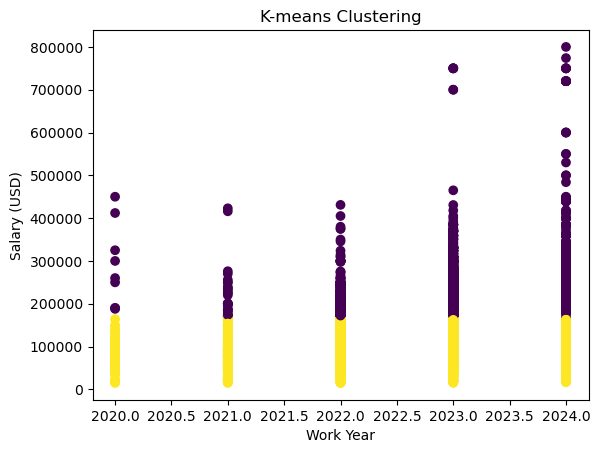

D:\Anaconda 2024\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


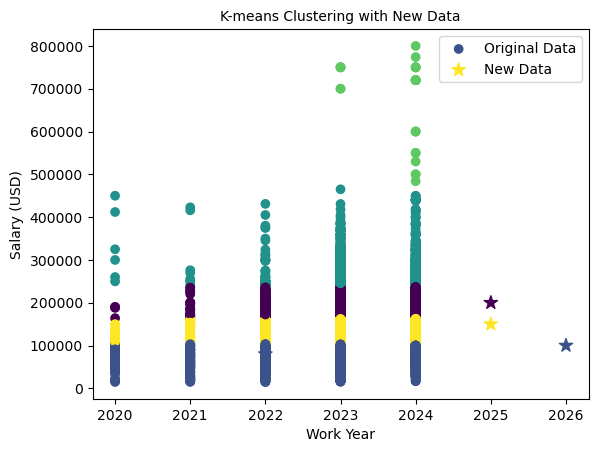

In [9]:
#K means clustering 
X = df[['work_year', 'salary_in_usd']]


# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)

# Add cluster labels to DataFrame
df['cluster'] = clusters

# Plot the clusters
plt.scatter(df['work_year'], df['salary_in_usd'], c=df['cluster'], cmap='viridis')
plt.xlabel('Work Year')
plt.ylabel('Salary (USD)')
plt.title('K-means Clustering')
plt.show()




#let assume new data points that to be added

new_data_values =[[2025,150000], [2026,100000], [2022,80000],[2025,200000]] 


# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=60, n_init=10)  # Explicitly set n_init
clusters = kmeans.fit_predict(X)

# Predict clusters for new data points
new_clusters = kmeans.predict(new_data_values)

# Plot the clusters
plt.scatter(X['work_year'], X['salary_in_usd'], c=clusters, cmap='viridis', label='Original Data')
plt.scatter(*zip(*new_data_values), c=new_clusters, cmap='viridis', marker='*', s=100, label='New Data')
plt.xlabel('Work Year',fontsize=10)
plt.ylabel('Salary (USD)',fontsize=10)
plt.title('K-means Clustering with New Data',fontsize=10)
plt.legend()
plt.show()

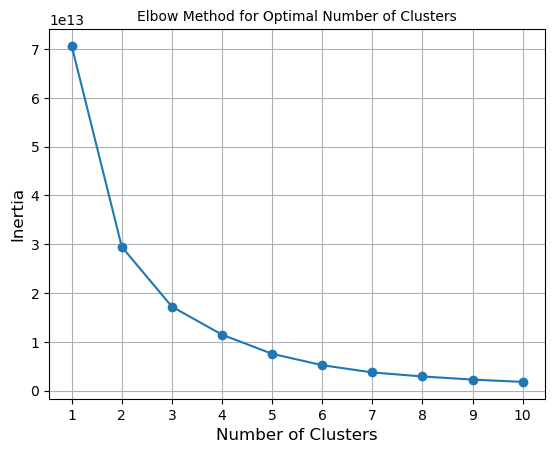

In [13]:
# Extract features for clustering
X = df[['work_year', 'salary_in_usd']]

# Initialize a list to store inertia values
inertia = []

# Test different numbers of clusters
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=40, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters',fontsize=12)
plt.ylabel('Inertia',fontsize=12)
plt.title('Elbow Method for Optimal Number of Clusters',fontsize=10)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


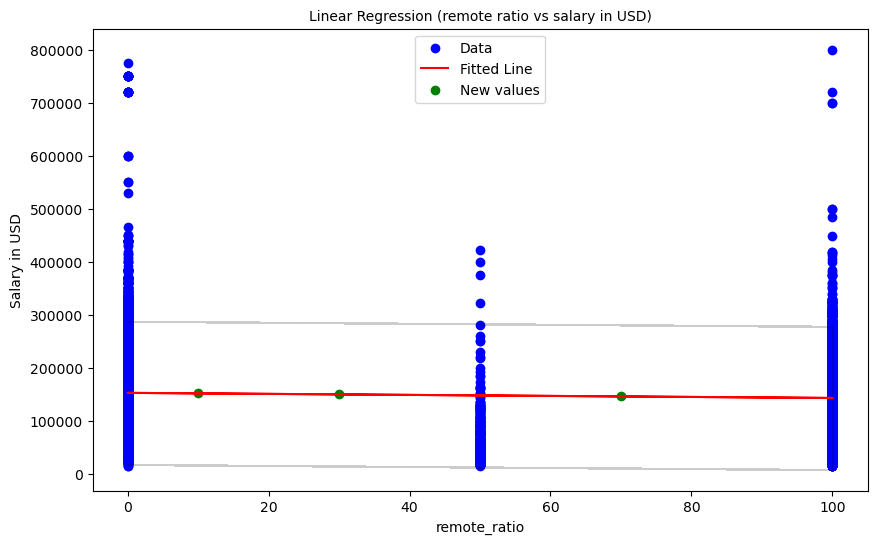

Slope: -96.23524741005
Intercept: 153027.43164618043
Confidence Interval (95%): 134977.44664404535


In [8]:
#for linear regression

def line_fitting(x, y, new_points=None):
    """
    Perform linear fitting, visualize the fitted line with confidence interval, and predict new data points.

    Parameters:
        x : Independent variable (x-axis).
        y : Dependent variable (y-axis).
        new_points : New points to be predicted (optional).

    Returns:
        tuple: Tuple containing slope, intercept, and confidence interval of the fitted line.
    """
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(x, y)

    # Generate predicted y-values based on the fitted line
    y_pred = model.predict(x)

    # Calculate residuals
    residuals = y - y_pred
    
    # Calculate standard deviation of residuals
    std_residuals = np.std(residuals)

    # Calculate t-value for a 95% confidence interval
    t_value = stats.t.ppf(0.975, df=len(x) - 2)

    # Calculate confidence interval for each point
    confidence_interval = t_value * std_residuals

    # Visualize Results
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, y_pred, color='red', label='Fitted Line')
    # Plot confidence interval
    plt.fill_between(x.flatten(), y_pred - confidence_interval, y_pred + confidence_interval, color='black', alpha=0.2)

    # Plot new points if provided
    if new_values:
        new_values_pred = model.predict(np.array(new_values).reshape(-1, 1))
        plt.scatter(new_values, new_values_pred, color='green', label='New values')

    plt.xlabel('remote_ratio',fontsize=10)
    plt.ylabel('Salary in USD',fontsize=10)
    plt.title('Linear Regression (remote ratio vs salary in USD)',fontsize=10)
    plt.legend()
    plt.show()

    # Return slope, intercept, and confidence interval
    return model.coef_[0], model.intercept_, confidence_interval

# Sample data (using the provided snippet)
data = df[['remote_ratio', 'salary_in_usd']]

# Independent variable (x-axis)
x = data['remote_ratio'].values.reshape(-1, 1)
# Dependent variable (y-axis)
y = data['salary_in_usd'].values

# New points to predict
new_values = [[10], [30], [70]]

# Fitting the best fit line, plotting with confidence interval, and predicting new data points
slope, intercept, confidence_interval = line_fitting(x, y, new_values)

# Printing the slope, intercept, and confidence interval
print("Slope:", slope)
print("Intercept:", intercept)
print("Confidence Interval (95%):", confidence_interval)


In [21]:
#calculate mean value for the numerical values in our data set up to 2 decimal points
numerical_columns=['salary_in_usd', 'remote_ratio','salary']

#mean calculation:
mean_values = {col: round(df[col].mean(),2) for col in numerical_columns}
print('Mean values for the numerical data are:', mean_values)



#standard deviation for numerical data
std_values = {col: round(df[col].std(),2) for col in numerical_columns}
print('Standard deviation values:',std_values)

#median value for numerical data
median_values = {col: round(df[col].median(),2) for col in numerical_columns}
print('Median values for the numerical data is:',median_values)

#Skewness value for numerical data
skewness_values = {col: round(df[col].skew(),2) for col in numerical_columns}
print('skewness values for the numerical data is:',skewness_values)

#Kurtosis value for numerical data
kurtosis_values = {col: round(df[col].kurtosis(),2) for col in numerical_columns}
print('kurtosis values for the numerical data is:',kurtosis_values)





Mean values for the numerical data are: {'salary_in_usd': 149874.72, 'remote_ratio': 32.76, 'salary': 165022.72}
Standard deviation values: {'salary_in_usd': 69009.18, 'remote_ratio': 46.49, 'salary': 356235.43}
Median values for the numerical data is: {'salary_in_usd': 141300.0, 'remote_ratio': 0.0, 'salary': 142200.0}
skewness values for the numerical data is: {'salary_in_usd': 1.52, 'remote_ratio': 0.73, 'salary': 50.01}
kurtosis values for the numerical data is: {'salary_in_usd': 7.84, 'remote_ratio': -1.44, 'salary': 3694.82}
